# KNN - K Nearest Neighbors - Classification

informasi tetang dataset gene expresiion : https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gene-expression-level

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# membaca data
df = pd.read_csv(r'C:\Users\ibrahim\01 -Mini Project Machine Learning\GENE EXPRESION WITH KNN CLASIFIER\gene_expression.csv')

In [3]:
# menampilkan 5 baris data pertama
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## EDA - exploratory data analysis

In [4]:
# jumlah kolom dan baris data
df.shape

(3000, 3)

In [5]:
# ringkasan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [6]:
# ringkasan statistik
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [7]:
# pengecekan nilai null
df.isna().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [8]:
# nama kolom pada dataset
df.columns

Index(['Gene One', 'Gene Two', 'Cancer Present'], dtype='object')

## Data visual

In [9]:
plt.style.use(['science','notebook','grid'])

In [10]:
# jumlah varian dalam kolom  
df['Cancer Present'].value_counts()

0    1500
1    1500
Name: Cancer Present, dtype: int64

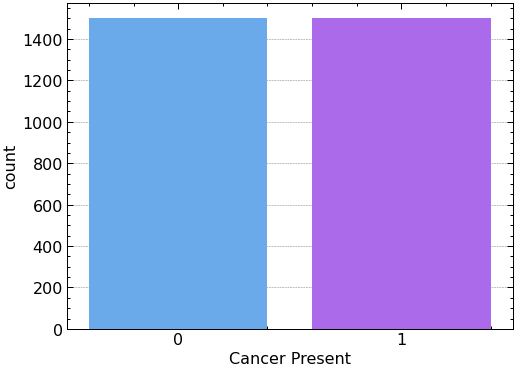

In [11]:
sns.countplot(x='Cancer Present', data=df, palette='cool');

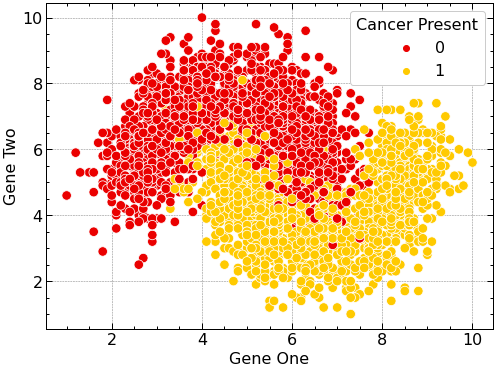

In [58]:
# sebaran data gene terhadap cancer present
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df, palette='hot', s=90);

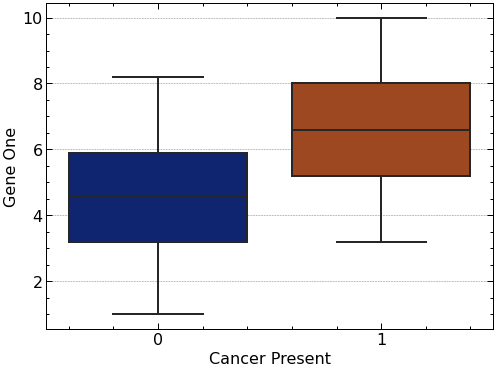

In [13]:
# sebaran data gene one
sns.boxplot(x='Cancer Present', y='Gene One', data=df, palette='dark');

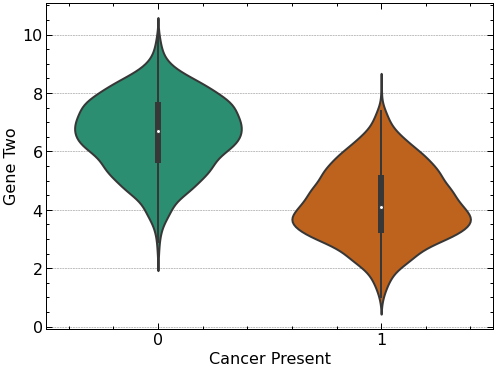

In [14]:
# sebaran data gene two
sns.violinplot(x='Cancer Present', y='Gene Two', data=df, palette='Dark2');

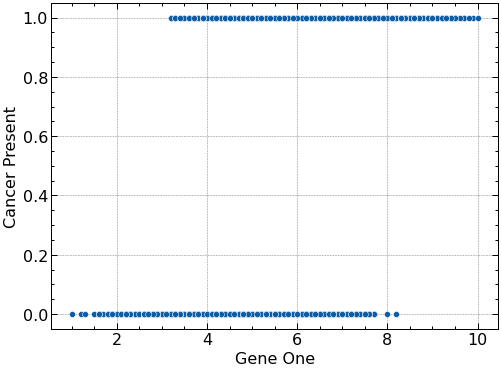

In [15]:
sns.scatterplot(x='Gene One', y='Cancer Present', data=df);

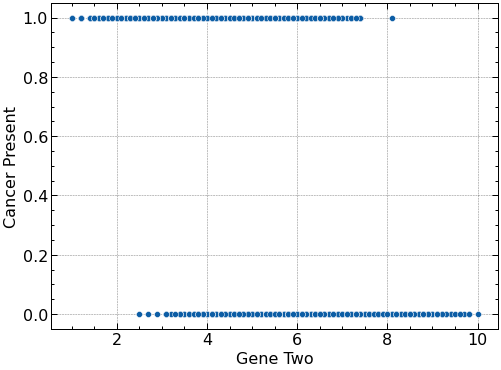

In [16]:
sns.scatterplot(x='Gene Two', y='Cancer Present', data=df);

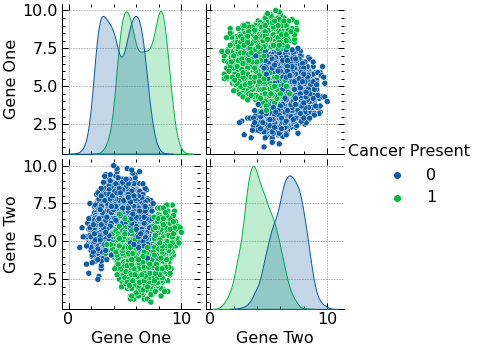

In [17]:
sns.pairplot(df, hue='Cancer Present');

## Split data

In [18]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# data training 80% dan data test 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

## Preprocessing - Scaler data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X_train)

StandardScaler()

In [24]:
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

## Model KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
model = KNeighborsClassifier(n_neighbors= 2)

In [27]:
model.fit(X_train_scaler, y_train)

KNeighborsClassifier(n_neighbors=2)

In [28]:
preds_model = model.predict(X_test_scaler)

---

## Evaluasi model menggunakan matrix

In [29]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score

In [30]:
confusion_matrix(y_test, preds_model)

array([[317,  11],
       [ 49, 223]], dtype=int64)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


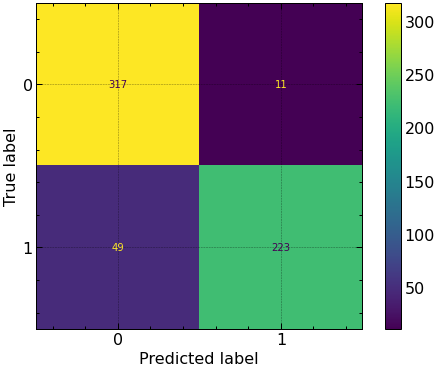

In [31]:
plot_confusion_matrix(model,X_test_scaler, y_test)

In [32]:
print(classification_report(y_test, preds_model))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       328
           1       0.95      0.82      0.88       272

    accuracy                           0.90       600
   macro avg       0.91      0.89      0.90       600
weighted avg       0.91      0.90      0.90       600



In [66]:
accuracy_score(y_test, preds_model)

0.9

## metode elbow

In [33]:
# untuk mencari nilai k yang terbaik untuk di terapkan kedalam n_neighbors

In [34]:
test_errors = []

for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaler, y_train)
    preds = model.predict(X_test_scaler)
    
    error = 1-accuracy_score(y_test, preds)
    test_errors.append(error)
    

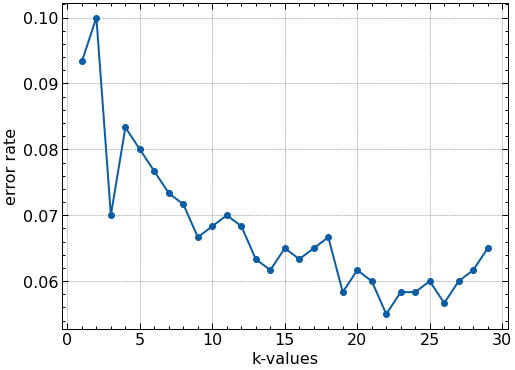

In [59]:
# plot perkiraan k values
plt.plot(range(1, 30), test_errors, 'o-');
plt.xlabel('k-values')
plt.ylabel('error rate')
plt.show()

## Pipeline

In [36]:
scaler = StandardScaler()

In [37]:
knn = KNeighborsClassifier()

In [38]:
operation = [('scaler',scaler),('knn',knn)]

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
pipe = Pipeline(operation)

## Hyperparamater Tuning GridSeachCV

In [41]:
k_values = list(range(1, 30))

In [42]:
param_grid = {'knn__n_neighbors': k_values}

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
grid = GridSearchCV(pipe, param_grid, cv =5, scoring='accuracy')

In [45]:
grid.fit(X_train_scaler, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [46]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=20))])

In [47]:
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 20,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [48]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [49]:
grid.cv_results_['mean_test_score']

array([0.90208333, 0.90583333, 0.92166667, 0.91916667, 0.92958333,
       0.92791667, 0.93125   , 0.92916667, 0.92833333, 0.925     ,
       0.92625   , 0.9275    , 0.93041667, 0.93208333, 0.92875   ,
       0.9325    , 0.93083333, 0.93333333, 0.93208333, 0.935     ,
       0.93416667, 0.9325    , 0.93208333, 0.93041667, 0.93083333,
       0.93333333, 0.93125   , 0.93166667, 0.92958333])

In [50]:
len(grid.cv_results_['mean_test_score'])

29

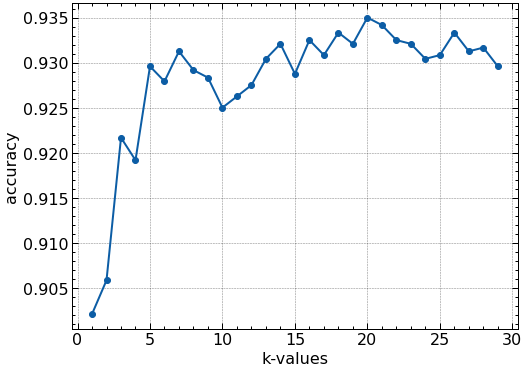

In [51]:
score = grid.cv_results_['mean_test_score']
plt.plot(range(1,30), score, 'o-')
plt.xlabel('k-values')
plt.ylabel('accuracy')
plt.show()

## Final model
nilai k terbaik `n_neighbors: 20` hasil hyperparamter tuning

In [52]:
scaler = StandardScaler()
knn20 = KNeighborsClassifier(n_neighbors=20)

In [53]:
operation = [('scaler', scaler),('knn20', knn20)]

In [54]:
pipe = Pipeline(operation)

In [55]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn20', KNeighborsClassifier(n_neighbors=20))])

In [56]:
preds = pipe.predict(X_test)

---

In [60]:
confusion_matrix(y_test, preds)

array([[311,  17],
       [ 20, 252]], dtype=int64)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


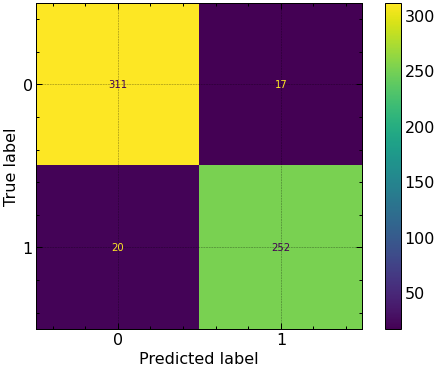

In [61]:
plot_confusion_matrix(pipe, X_test, y_test)

In [63]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       328
           1       0.94      0.93      0.93       272

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [64]:
accuracy_score(y_test, preds)

0.9383333333333334

In [71]:
sample_test = X_test.iloc[20]

In [80]:
sample_test

Gene One    5.4
Gene Two    5.1
Name: 44, dtype: float64

In [81]:
pipe.predict(sample_test.values.reshape(1, -1))

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [82]:
pipe.predict_proba(sample_test.values.reshape(1, -1))

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.15, 0.85]])